In [20]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
#import dataset
df1 = pd.read_csv('loan-train.csv')

In [12]:
# Data Exploration and Cleaning
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
df1.shape

(614, 13)

In [15]:
#Check each column is unique 
df1.Loan_ID.value_counts(dropna=False)

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

In [ ]:
# we get 614 rows means all are unique values
df1.info()

In [17]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Married
Yes    398
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

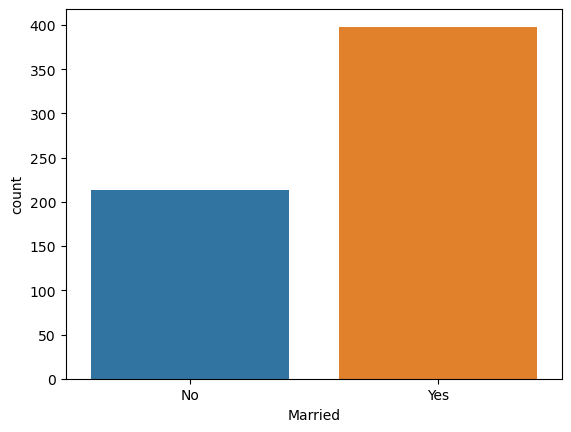

In [27]:
print(df1["Married"].value_counts())
sns.countplot(x="Married",data=df1)

In [28]:
#This shows married couples applies more application for loan

Gender
Male      489
Female    112
Name: count, dtype: int64


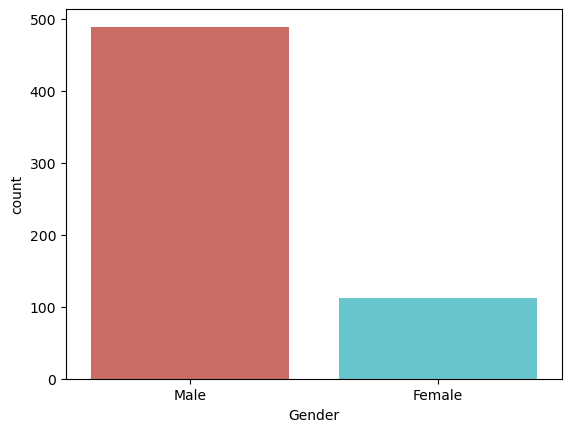

In [29]:
print(df1["Gender"].value_counts())
sns.countplot(x="Gender", data=df1, palette="hls")
plt.show()

In [30]:
#Thus males applies more loan applications than Females

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


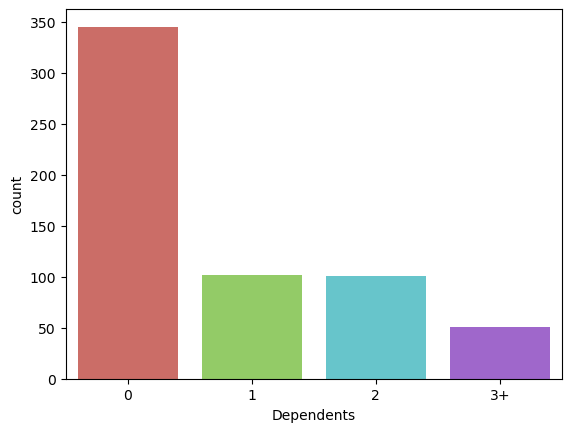

In [31]:
print(df1["Dependents"].value_counts())
sns.countplot(x="Dependents", data=df1, palette="hls")
plt.show()

In [32]:
#This shows person having 0 dependents have more loan applications

Self_Employed
No     500
Yes     82
Name: count, dtype: int64


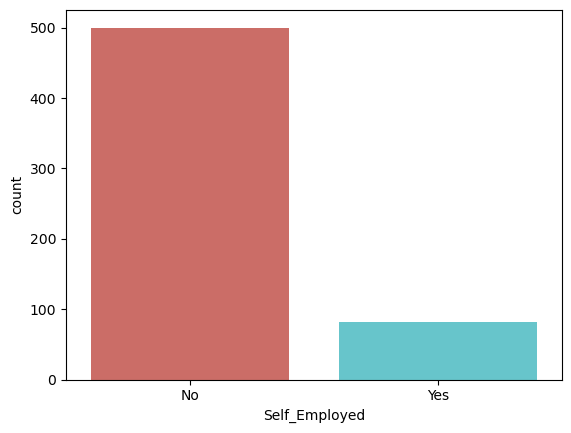

In [34]:
print(df1["Self_Employed"].value_counts())
sns.countplot(x="Self_Employed", data=df1, palette="hls")
plt.show()

In [35]:
#This shows person enrolled in jobs apply more loan applications than self employed

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64


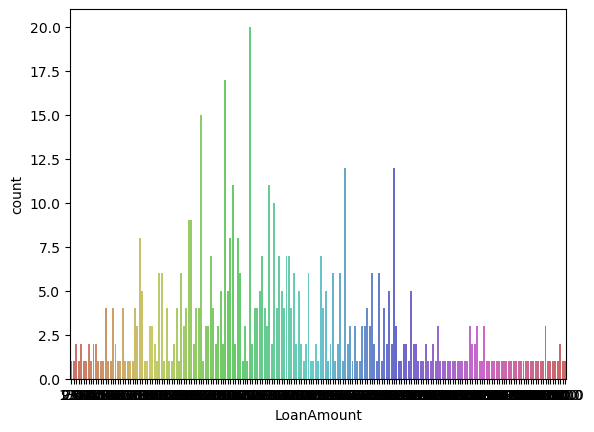

In [37]:
print(df1["LoanAmount"].value_counts())
sns.countplot(x="LoanAmount", data=df1, palette="hls")
plt.show()

In [38]:
#this shows different loan amount have been applied by the people and average loan amount is applied by maximum people

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


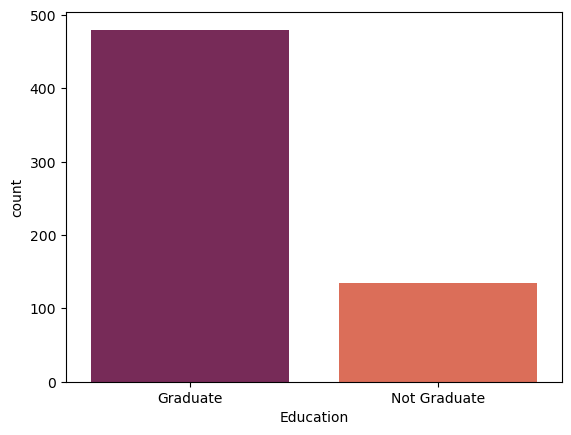

In [39]:
print(df1["Education"].value_counts())
sns.countplot(x="Education", data=df1, palette="rocket")
plt.show()

In [41]:
#Grpah shows more graduate people apply for loans

In [44]:
#lets check dependency of credit history on loan approval
pd.crosstab(df1["Credit_History"],df1["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

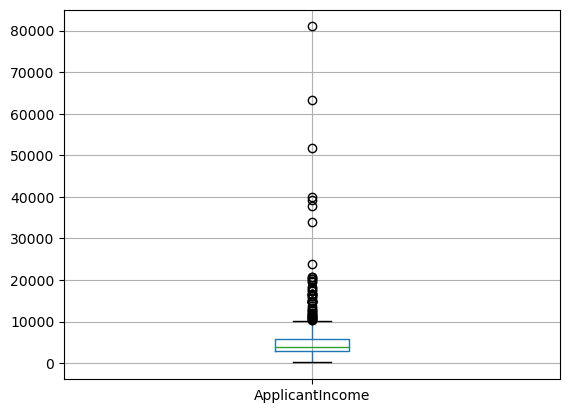

In [48]:
#check any outliners in the dataset by ploting box aand histogram plots
df1.boxplot(column='ApplicantIncome')


<Axes: >

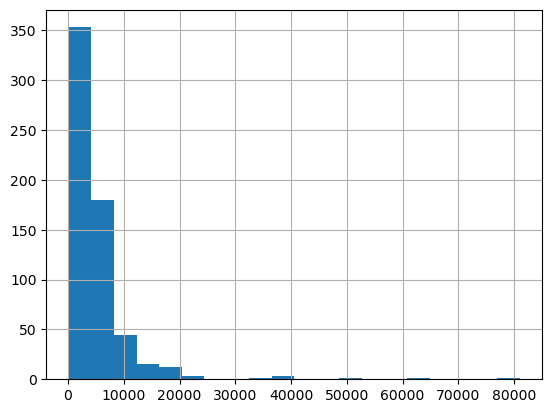

In [69]:
df1['ApplicantIncome'].hist(bins=20)

<Axes: >

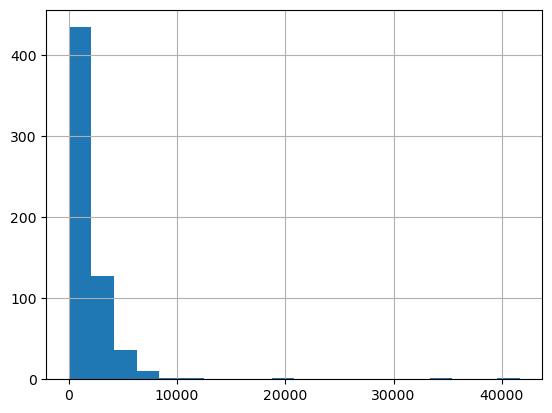

In [70]:
df1["CoapplicantIncome"].hist(bins=20)

In [72]:
df1["Total_Income"]=df1["ApplicantIncome"]+df1["CoapplicantIncome"]
df1["TotalIncome_log"]=np.log(df1["Total_Income"])

<Axes: >

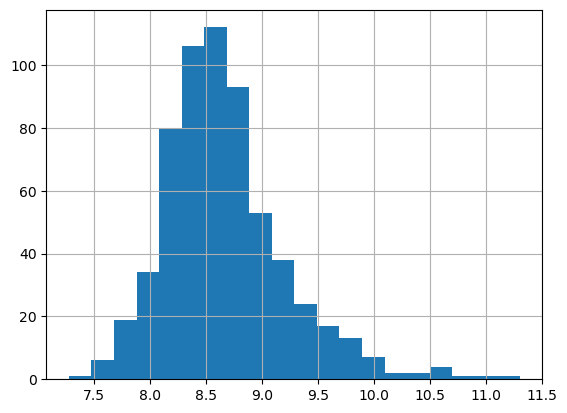

In [73]:
df1["TotalIncome_log"].hist(bins=20)

In [75]:
# this is now normailsed attribute

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

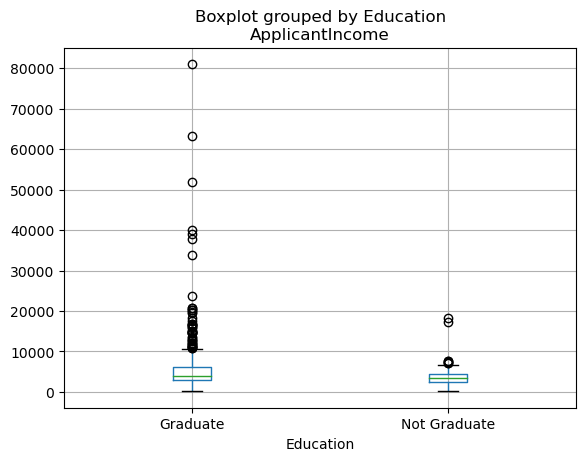

In [59]:
df1.boxplot(column="ApplicantIncome",by="Education")

In [76]:
#We infer that medium salary doesnot vary much for educated and not graduated applicants 
#but graduated have more higher outliners of income as compared to not graduated.

<Axes: >

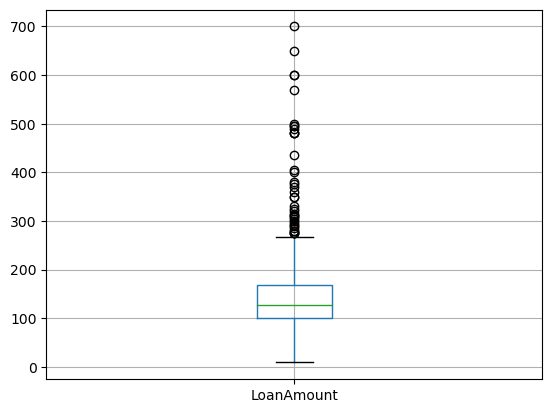

In [77]:
df1.boxplot(column='LoanAmount')

<Axes: >

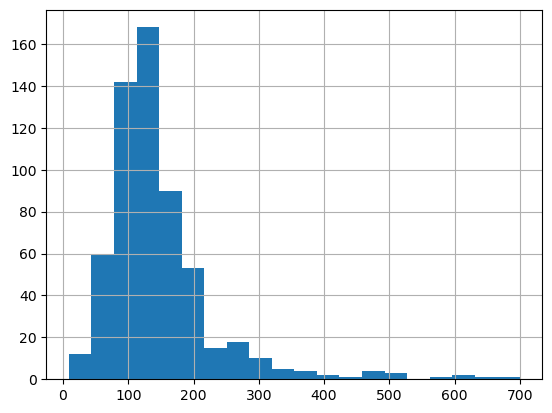

In [62]:
df1["LoanAmount"].hist(bins=20)

<Axes: >

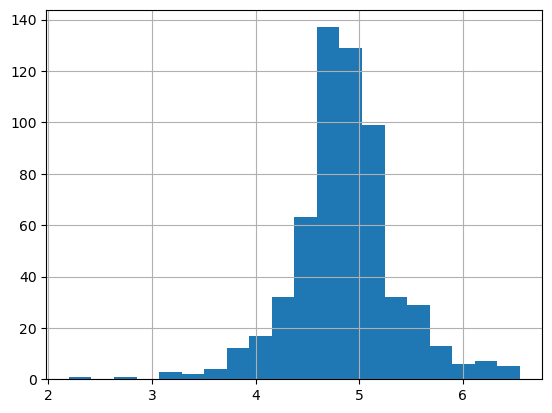

In [63]:
#We can see both from boxplot and hist plots that loanamount is a little right skewed, so lets normalise it by taking log of this
df1["LoanAmount_Log"]=np.log(df1["LoanAmount"])
df1['LoanAmount_Log'].hist(bins=20)

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


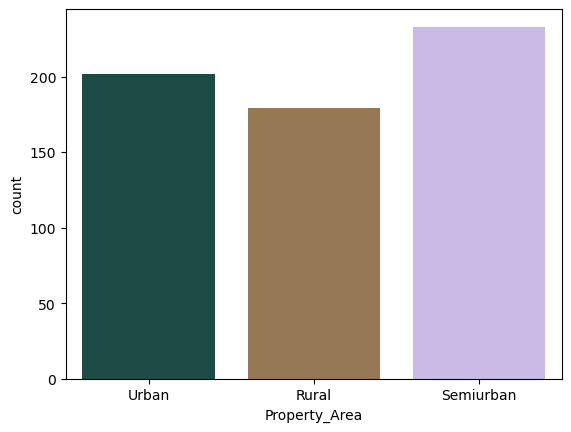

In [91]:
print(df1["Property_Area"].value_counts())
sns.countplot(x="Property_Area", data=df1, palette="cubehelix")
plt.show()

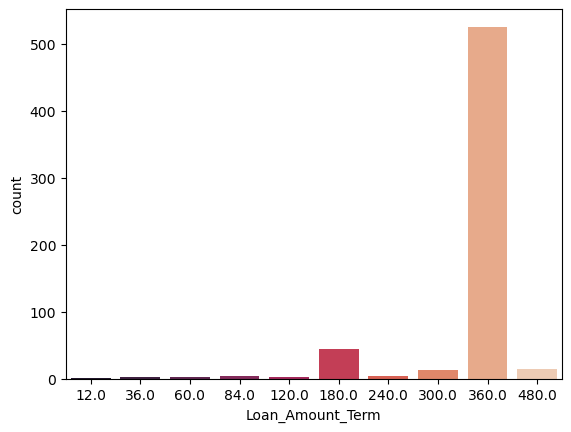

In [92]:
sns.countplot(x="Loan_Amount_Term", data=df1, palette="rocket")
plt.show()

In [78]:
#Now lets look into null values 

In [80]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
LoanAmount_Log       22
TotalIncome_log       0
dtype: int64

In [89]:
#to fill null values
df1["Gender"].fillna(df1["Gender"].mode(),inplace=True)
df1["Married"].fillna(df1["Married"].mode(),inplace=True)
df1["Dependents"].fillna(df1["Dependents"].mode(),inplace=True)
df1["Self_Employed"].fillna(df1["Self_Employed"].mode(),inplace=True)
df1["Credit_History"].fillna(df1["Credit_History"].mode(),inplace=True)
df1["Loan_Amount_Term"].fillna(df1["Loan_Amount_Term"].mode(),inplace=True)
df1["LoanAmount"].fillna(df1["LoanAmount"].mean(),inplace=True)
df1["LoanAmount_Log"].fillna(df1["LoanAmount_Log"].mean(),inplace=True)
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
LoanAmount_Log       0
TotalIncome_log      0
dtype: int64

In [90]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,LoanAmount_Log,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,4.857444,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,4.948760,8.699515


In [140]:
#Lets seperate the attributes into dependent and independent variables
x=df1.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df1.iloc[:,12].values
print(x)
print(y)

[['Male' 'No' '0' ... 1.0 5849.0 4.857444178729352]
 ['Male' 'Yes' '1' ... 1.0 6091.0 4.852030263919617]
 ['Male' 'Yes' '0' ... 1.0 3000.0 4.189654742026425]
 ...
 ['Male' 'Yes' '1' ... 1.0 8312.0 5.53338948872752]
 ['Male' 'Yes' '2' ... 1.0 7583.0 5.231108616854587]
 ['Female' 'No' '0' ... 0.0 4583.0 4.890349128221754]]
['Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N'

In [142]:
#Lets split dataset into train and test datasets of ratio 80:20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train)

[['Male' 'Yes' '0' ... 1.0 5858.0 4.875197323201151]
 ['Male' 'No' '1' ... 1.0 11250.0 5.278114659230517]
 ['Male' 'Yes' '0' ... 0.0 5681.0 5.003946305945459]
 ...
 ['Male' 'Yes' '3+' ... 1.0 8334.0 5.298317366548036]
 ['Male' 'Yes' '0' ... 1.0 6033.0 5.075173815233827]
 ['Female' 'Yes' '0' ... 1.0 6486.0 5.204006687076795]]


In [143]:
#Lets convert the categorical attributes in a numeric way so that our
#Machine Learning Models can easily understand the data
from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()
for i in range(0,5):
    x_train[:,i]=labelencoder_x.fit_transform(x_train[:,i])
x_train[:,7]=labelencoder_x.fit_transform(x_train[:,7])
x_train

array([[1, 1, 0, ..., 1.0, 5858.0, 81],
       [1, 0, 1, ..., 1.0, 11250.0, 131],
       [1, 1, 0, ..., 0.0, 5681.0, 98],
       ...,
       [1, 1, 3, ..., 1.0, 8334.0, 132],
       [1, 1, 0, ..., 1.0, 6033.0, 108],
       [0, 1, 0, ..., 1.0, 6486.0, 122]], dtype=object)

In [144]:
#similarly lets apply it on dependent variable
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [145]:
#Let us apply the similar chnage in test dataset too
for i in range(0,5):
    x_test[:,i]=labelencoder_x.fit_transform(x_test[:,i])
x_test[:,7]=labelencoder_x.fit_transform(x_test[:,7])
x_test

array([[1, 0, 0, 0, 5, 1.0, 7085.0, 10],
       [0, 0, 0, 0, 5, 1.0, 4230.0, 24],
       [1, 1, 0, 0, 5, 1.0, 10039.0, 71],
       [1, 1, 0, 0, 5, 1.0, 6784.0, 22],
       [1, 1, 2, 0, 5, 1.0, 3875.0, 16],
       [1, 1, 0, 1, 3, 0.0, 6058.0, 48],
       [1, 1, 3, 0, 3, 1.0, 6417.0, 45],
       [1, 0, 0, 0, 5, 1.0, 12876.0, 72],
       [1, 0, 0, 0, 5, 0.0, 5124.0, 30],
       [1, 1, 0, 0, 5, 1.0, 5233.0, 33],
       [0, 0, 0, 0, 5, 1.0, 2917.0, 10],
       [1, 1, 1, 0, 5, 1.0, 2895.0, 14],
       [0, 0, 0, 0, 5, 1.0, 8333.0, 68],
       [1, 1, 2, 0, 5, 1.0, 8667.0, 65],
       [1, 1, 0, 0, 5, 1.0, 14880.0, 15],
       [1, 1, 1, 0, 5, 1.0, 3875.0, 3],
       [1, 0, 1, 1, 5, 1.0, 4311.0, 58],
       [1, 0, 0, 1, 5, 1.0, 3946.0, 36],
       [0, 0, 0, 0, 5, 1.0, 2500.0, 13],
       [1, 1, 0, 1, 5, 0.0, 4787.0, 55],
       [0, 1, 0, 0, 5, 0.0, 6085.0, 28],
       [1, 1, 0, 0, 5, 1.0, 4765.0, 43],
       [1, 1, 2, 0, 5, 1.0, 7550.0, 21],
       [1, 1, 2, 0, 5, 1.0, 11500.0, 48],
       [1, 1,

In [146]:
y_test=labelencoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [147]:
# Lets scale our numeric data using standard scalr function
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [150]:
#Now all the data preprocessing is done.
#Lets apply machine learning Alogithums
#Model 1 Decission Tree
from sklearn.tree import DecisionTreeClassifier
dtclassifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtclassifier.fit(x_train,y_train)
y_pred = dtclassifier.predict(x_test)
print(y_pred)
from sklearn import metrics
print("The accuracy for Decission Tree Algoirthum is: ",metrics.accuracy_score(y_pred,y_test))

[1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1
 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1
 1 0 1 0 0 1 0 1 1 0 0 0]
The accuracy for Decission Tree Algoirthum is:  0.7073170731707317


In [151]:
#Model 2 Naive Baye
from sklearn.naive_bayes import GaussianNB
nbclassifier=GaussianNB()
nbclassifier.fit(x_train,y_train)
y_pred =nbclassifier.predict(x_test)
print(y_pred)
print("The accuracy for Naive Baye Algoirthum is: ",metrics.accuracy_score(y_pred,y_test))

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
The accuracy for Naive Baye Algoirthum is:  0.8373983739837398


In [152]:
#Model 3 Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rfclassifier=RandomForestClassifier()
rfclassifier.fit(x_train,y_train)
y_pred =rfclassifier.predict(x_test)
print(y_pred)
print("The accuracy for Random Forest Algoirthum is: ",metrics.accuracy_score(y_pred,y_test))

[1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1
 0 0 1 0 0 1 1 1 1 0 0 0]
The accuracy for Random Forest Algoirthum is:  0.7479674796747967


In [153]:
#Model 4 K neighbours
from sklearn.neighbors import KNeighborsClassifier
knclassifier=KNeighborsClassifier()
knclassifier.fit(x_train,y_train)
y_pred =knclassifier.predict(x_test)
print(y_pred)
print("The accuracy for KNeighbours Algoirthum is: ",metrics.accuracy_score(y_pred,y_test))

[1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 0 1 1 1 1 0 0 1]
The accuracy for KNeighbours Algoirthum is:  0.8048780487804879


In [155]:
#Hence best model working for this dataset is Naive Baye
#Lets test this model on our another test dataset
#Importt the new datset whose loan approval output we need to find using our model
df2=pd.read_csv('loan-test.csv')

In [157]:
#Explore this test dataset and Make this dataset into same format as out previous dataset
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [158]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [167]:
df2.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [172]:
#to fill null values
df2["Gender"].fillna(df2["Gender"].mode()[0],inplace=True)
df2["Married"].fillna(df2["Married"].mode()[0],inplace=True)
df2["Dependents"].fillna(df2["Dependents"].mode()[0],inplace=True)
df2["Self_Employed"].fillna(df2["Self_Employed"].mode()[0],inplace=True)
df2["Credit_History"].fillna(df2["Credit_History"].mode()[0],inplace=True)
df2["Loan_Amount_Term"].fillna(df2["Loan_Amount_Term"].mode()[0],inplace=True)
df2["LoanAmount"].fillna(df2["LoanAmount"].mean(),inplace=True)
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

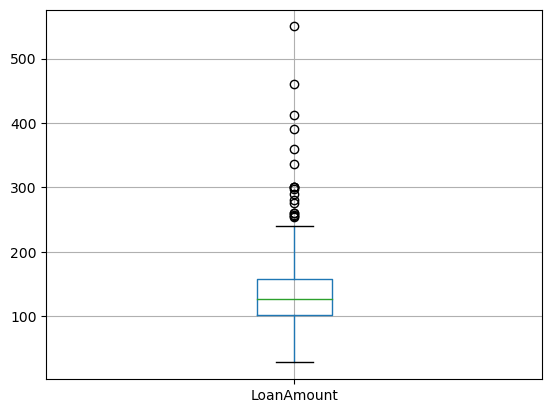

In [173]:
#Lets check the outliers 
df2.boxplot(column="LoanAmount")

<Axes: >

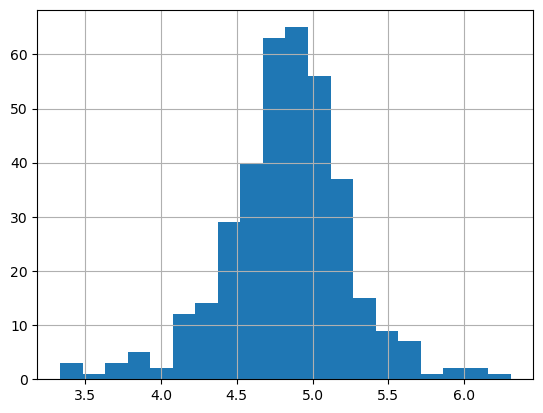

In [174]:
df2["LoanAmount_Log"]=np.log(df2["LoanAmount"])
df2['LoanAmount_Log'].hist(bins=20)

<Axes: >

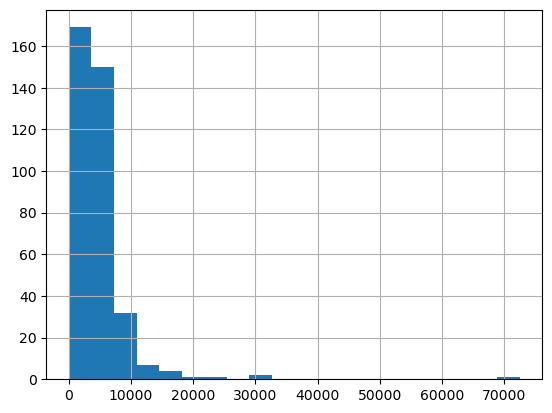

In [187]:
df2['ApplicantIncome'].hist(bins=20)

<Axes: >

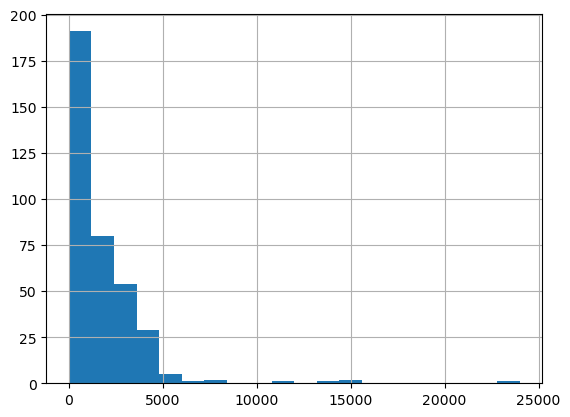

In [188]:
df2['CoapplicantIncome'].hist(bins=20)

In [189]:
df2["Total_Income"]=df2["ApplicantIncome"]+df2["CoapplicantIncome"]
df2["TotalIncome_log"]=np.log(df2["Total_Income"])

<Axes: >

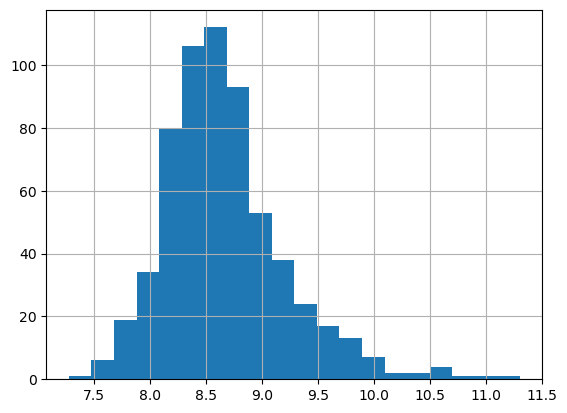

In [178]:
df1['TotalIncome_log'].hist(bins=20)

In [190]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
 12  LoanAmount_Log     367 non-null    float64
 13  Total_Income       367 non-null    int64  
 14  TotalIncome_log    367 non-null    float64
dtypes: float64(5), int64(3), object(7)
memory usage: 43.1+ KB


In [192]:
#Lets seperate the attributes into dependent and independent variables
test=df2.iloc[:,np.r_[1:5,9:11,13:15]].values
test

array([['Male', 'Yes', '0', ..., 1.0, 5720, 8.651724084373843],
       ['Male', 'Yes', '1', ..., 1.0, 4576, 8.428580533059634],
       ['Male', 'Yes', '2', ..., 1.0, 6800, 8.824677891164198],
       ...,
       ['Male', 'No', '0', ..., 1.0, 5243, 8.564649132572534],
       ['Male', 'Yes', '0', ..., 1.0, 7393, 8.9082888855571],
       ['Male', 'No', '0', ..., 1.0, 9200, 9.126958763037132]],
      dtype=object)

In [194]:
for i in range(0,5):
    test[:,i]=labelencoder_x.fit_transform(test[:,i])
test[:,7]=labelencoder_x.fit_transform(test[:,7])
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [195]:
#Scale the dataframe
test=ss.fit_transform(test)

In [196]:
pred=nbclassifier.predict(test)

In [197]:
print(pred)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
#In general, it can be seen that all models can achieve up to 70% accuracy.
3#The highest accuracy is 84%%.
